<a href="https://colab.research.google.com/github/dmmajithia/acapp-train-classification/blob/main/acapp%20coal%20training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# 
# For your non-Colab code, be sure you have tensorflow==1.15
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

In [2]:
train_data_dir = '/content/acapp-train-classification/acapp_data/training_images/'

In [3]:
!rm -rf acapp-train-classification
!git clone https://github.com/dmmajithia/acapp-train-classification.git

Cloning into 'acapp-train-classification'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 78768 (delta 13), reused 0 (delta 0), pack-reused 78741
Receiving objects: 100% (78768/78768), 1.55 GiB | 36.70 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Checking out files: 100% (77996/77996), done.


In [17]:
!ls /content/acapp-train-classification/acapp_data/training_images/one_train | wc -l

7707


In [11]:
# https://superuser.com/questions/1186350/delete-all-but-1000-random-files-in-a-directory
!find /content/acapp-train-classification/acapp_data/training_images/night_train -type f -print0 | sort -zR | tail -zn +3855 | xargs -0 rm

In [12]:
!mv /content/acapp-train-classification/acapp_data/training_images/night_train/* /content/acapp-train-classification/acapp_data/training_images/one_train/

In [15]:
!rm -rf /content/acapp-train-classification/acapp_data/training_images/mul_trains
!rm -rf /content/acapp-train-classification/acapp_data/training_images/night_no_train
!rm -rf /content/acapp-train-classification/acapp_data/training_images/night_train
# !rm -rf /content/acapp-train-classification/acapp_data/training_images/mul_trains

In [18]:
img_height, img_width = 300,300
batch_size = 2

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    # class_mode='categorical',
    # class_mode='binary',
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    # class_mode='categorical',
    # class_mode='binary',
    class_mode='sparse',
    subset='validation') # set as validation data

# # Validation ImageDataGenerator with rescaling.
# valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
# # Training ImagaDataGenerator with Augmentation transf.  
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,\
#                                    rotation_range=15, shear_range=10,\
#                                    zoom_range=0.25, fill_mode='nearest', \
#                                    height_shift_range=0.25, width_shift_range=0.25)

# # Create a flow from the directory for validation data - seed=42
# # Choose subset = 'validation'
# validation_generator = valid_datagen.flow_from_directory(train_data_dir,
#                                                          subset='validation',
#                                                          shuffle=True, 
#                                                          seed=42, 
#                                                          target_size=(img_height, img_width),
#                                                          batch_size=batch_size,
#                                                          class_mode='binary')
# # Create a flow from the directory using same seed and 'training' subset.
# train_generator = train_datagen.flow_from_directory(train_data_dir, 
#                                                     subset='training',
#                                                     shuffle=True,
#                                                     seed=42,
#                                                     target_size=(img_height, img_width),
#                                                     batch_size=batch_size,
#                                                     class_mode='binary')

Found 10790 images belonging to 2 classes.
Found 4624 images belonging to 2 classes.


In [ ]:
# acc = 95-99, batch_size = 50, epochs = 20
input_shape = (300, 300, 3)
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [ ]:
def get_model_daytime2class():
  # acc = 95-99, batch_size = 50, epochs = 20
  input_shape = (300, 300, 3)
  # Creating a Sequential Model and adding the layers
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
  model.add(Dense(64, activation='relu'))
  # model.add(Dropout(0.1))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3,activation='softmax'))
  return model

In [ ]:
# input_shape = (300, 300, 3)
# # Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(64, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(128, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dense(5,activation='softmax'))

In [20]:
# https://stackoverflow.com/a/63394332
# https://github.com/keras-team/keras/issues/10472#issuecomment-472543538

from sklearn.metrics import confusion_matrix
class Metrics(keras.callbacks.Callback):
    def __init__(self, val_data, batch_size):
      super().__init__()
      self._data = []
      self.validation_data = val_data
      self.batch_size = batch_size
    
    def on_train_begin(self, logs={}):
        print(self.validation_data)
        # self.val_f1s = []
        # self.val_recalls = []
        # self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        # x_test, y_test = self.validation_data[0], self.validation_data[1]
        # if not epoch:
        #   return
        # x_test, y_test = [],[]
        # for x,y in self.validation_data:
        #   x_test.append(x)
        #   y_test.append(y)
        # y_predict = np.asarray(model.predict(x_test))

        batches = len(self.validation_data)
        total = batches * self.batch_size
        
        val_pred = np.zeros((total,1))
        val_true = np.zeros((total))
        
        for batch in range(batches):
            xVal, yVal = next(self.validation_data)
            preds = np.asarray(self.model.predict(xVal))
            preds = np.array([[np.argmax(p)] for p in preds])
            # print(preds.shape)
            # return
            val_pred[batch * preds.shape[0] : (batch+1) * preds.shape[0]] = preds
            val_true[batch * preds.shape[0] : (batch+1) * preds.shape[0]] = yVal

        # true = np.argmax(val_true, axis=1)
        # pred = np.argmax(val_predict, axis=1)
        
        cm = confusion_matrix(val_true, val_pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        self._data.append({
            'classLevelaccuracy':cm.diagonal() ,
        })
        return

    def get_data(self):
        return self._data

from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("test_3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [21]:
# model = get_model_daytime2class()
# model = keras.applications.Xception(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=input_shape,
#     pooling="max",
#     classes=2,
#     classifier_activation="softmax",
# )
input_shape = (300, 300, 3)
model = keras.applications.MobileNetV2(
    input_shape=input_shape,
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling='max',
    classes=2,
    classifier_activation="softmax"
)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              # loss='kullback_leibler_divergence',
              # loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 50
# metrics = Metrics(validation_generator,batch_size)
history = model.fit(
    train_generator,
    steps_per_epoch=int(np.ceil(train_generator.n / float(batch_size))),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=int(np.ceil(validation_generator.n / float(batch_size))),
    callbacks=[metrics,checkpoint,early]
)

In [24]:
metrics.get_data()[-6]

{'classLevelaccuracy': array([0.98788927, 0.94031142])}

In [25]:
!ls /content/acapp-train-classification/acapp_data/training_images

no_train  one_train


In [ ]:
p = model.predict(validation_generator, batch_size=batch_size, steps=int(np.ceil(validation_generator.n / float(batch_size))))

In [ ]:
for pi in p:
  print(p)
  break

[[9.9976951e-01 1.1370429e-05 2.1918215e-04]
 [1.6042386e-03 4.1874833e-03 9.9420822e-01]
 [1.8274468e-04 9.9911290e-01 7.0438837e-04]
 ...
 [1.3995600e-01 1.3449878e-04 8.5990947e-01]
 [6.4153753e-02 7.2425264e-01 2.1159352e-01]
 [4.2807448e-04 9.6329314e-01 3.6278728e-02]]


In [29]:
model.save('mobilnet_v2_2class-daynight.h5')

In [30]:
!tar -cvzf mobilnet_v2_2class-daynight.h5.tgz mobilnet_v2_2class-daynight.h5
from google.colab import files
files.download('/content/mobilnet_v2_2class-daynight.h5.tgz')

mobilnet_v2_2class-daynight.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('daytime2class')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: daytime2class/assets


In [ ]:
!tar -cvzf daytime2class.tgz daytime2class

daytime2class/
daytime2class/saved_model.pb
daytime2class/assets/
daytime2class/variables/
daytime2class/variables/variables.index
daytime2class/variables/variables.data-00000-of-00001


In [ ]:
from google.colab import files
files.download('/content/daytime2class.tgz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

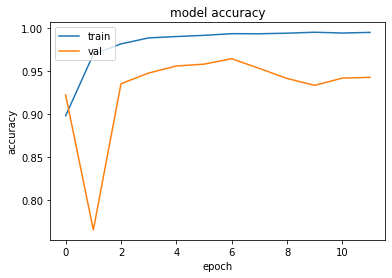

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

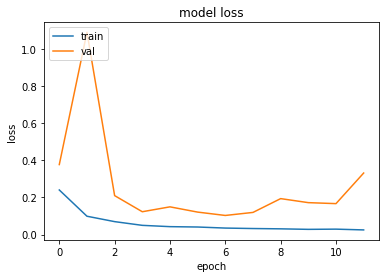

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Quant aware training on pre trained mobilenet v2 2 class daynight

In [6]:
!pip install -q tensorflow-model-optimization

     |████████████████████████████████| 174kB 4.7MB/s 


In [ ]:
# https://www.tensorflow.org/model_optimization/guide/quantization/training_example

import tensorflow_model_optimization as tfmot
quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

In [37]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("qaware2class.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=1, mode='auto')

epochs = 1
# metrics = Metrics(validation_generator,batch_size)
history2 = q_aware_model.fit(
    train_generator,
    steps_per_epoch=int(np.ceil(train_generator.n / float(batch_size))),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=int(np.ceil(validation_generator.n / float(batch_size))),
    callbacks=[metrics,checkpoint,early]
)

5395/5395 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9964
Epoch 00001: val_accuracy improved from -inf to 0.93815, saving model to qaware2class.h5
5395/5395 [==============================] - 1816s 337ms/step - loss: 0.0190 - accuracy: 0.9964 - val_loss: 0.2408 - val_accuracy: 0.9381


In [51]:
!tar -cvzf qaware2class.h5.tgz qaware2class.h5
from google.colab import files
files.download('/content/qaware2class.h5.tgz')

qaware2class.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
metrics.get_data()

[{'classLevelaccuracy': array([0.97275087, 0.87110727])},
 {'classLevelaccuracy': array([0.58261246, 0.94766436])},
 {'classLevelaccuracy': array([0.96453287, 0.90570934])},
 {'classLevelaccuracy': array([0.98615917, 0.90873702])},
 {'classLevelaccuracy': array([0.95631488, 0.9550173 ])},
 {'classLevelaccuracy': array([0.98140138, 0.93425606])},
 {'classLevelaccuracy': array([0.98788927, 0.94031142])},
 {'classLevelaccuracy': array([0.97880623, 0.92690311])},
 {'classLevelaccuracy': array([0.97923875, 0.90311419])},
 {'classLevelaccuracy': array([0.94377163, 0.92257785])},
 {'classLevelaccuracy': array([0.97188581, 0.91133218])},
 {'classLevelaccuracy': array([0.98269896, 0.90224913])},
 {'classLevelaccuracy': array([0.96712803, 0.88408304])},
 {'classLevelaccuracy': array([0.98961938, 0.87716263])},
 {'classLevelaccuracy': array([0.98788927, 0.90657439])},
 {'classLevelaccuracy': array([0.97880623, 0.90960208])},
 {'classLevelaccuracy': array([0.98486159, 0.90484429])},
 {'classLevela

In [18]:
# A generator that provides a representative dataset
def representative_data_gen():
  dataset_list = tf.data.Dataset.list_files(train_data_dir + '*/*')
  for i in range(1000):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    # image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image = tf.cast(tf.cast(image, tf.float32) / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

# assert tf.__version__.startswith('1')
# import tensorflow_model_optimization as tfmot
# with tfmot.quantization.keras.quantize_scope():
loaded_model = tf.keras.models.load_model('mobilnet_v2_2class-daynight.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input and output tensors to uint8
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
# # And this sets the representative dataset so we can quantize the activations
converter.representative_dataset = representative_data_gen
quantized_tflite_model = converter.convert()
with open('mobilenet_v2_2class-daynight_quant-1.tflite', 'wb') as f:
  f.write(quantized_tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpwvmuc9a_/assets


INFO:tensorflow:Assets written to: /tmp/tmpwvmuc9a_/assets


In [12]:
!tar -xvzf mobilnet_v2_2class-daynight.h5.tgz

mobilnet_v2_2class-daynight.h5


In [3]:
tf.__version__

'2.3.0'

In [19]:
# Compiling for the edge tpu

! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler	

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  31095      0 --:--:-- --:--:-- --:--:-- 31095
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease [6,332 B]
Hit:9 http://ppa.launch

In [20]:
! edgetpu_compiler mobilenet_v2_2class-daynight_quant-1.tflite

Edge TPU Compiler version 14.1.317412892

Model compiled successfully in 465 ms.

Input model: mobilenet_v2_2class-daynight_quant-1.tflite
Input size: 2.72MiB
Output model: mobilenet_v2_2class-daynight_quant-1_edgetpu.tflite
Output size: 2.81MiB
On-chip memory used for caching model parameters: 2.71MiB
On-chip memory remaining for caching model parameters: 2.94MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 72
Operation log: mobilenet_v2_2class-daynight_quant-1_edgetpu.log
See the operation log file for individual operation details.
